# Lab 5 - Gaussowski Model Mieszany

Gaussowski Model Mieszany to kolejna metoda wykorzystywana w analizie skupień, która jest oparta na założeniach probabilistycznych. W tym przypadku założenia polegają na pochodzeniu danych wejściowych z kilku rozkładów Gaussowskich, których parametry nie są znane. Znana musi być natomiast liczba rozkładów definiujących dane, co odpowiada liczbie skupień.

Proces probabilistyczny generujący analizowany zbiór danych może zostać przedstawiony następująco:

1. dla każdego obiektu skupienie jest przydzielane losowo na podstawie $k$ różnych skupień; prawdopodobieństwo dobrania $j$-tego skupienia przez $\phi ^{(j)}$ - wagę skupienia; $z^{(i)}$ będzie oznaczać indeks skupienia przypisanego obiektowi $i$-temu;
2. jeżeli $i$-ty obiekty zostanie przypisany $j$-temu skupieniu ($z^{(i)}=j$), to położenie $x^{(i)}$ obiektu jest losowo dobierane z rozkładu Gaussa o średniej arytmetycznej $\mu ^{(j)}$ i macierzy kowariancji $\Sigma ^{(j)}$, co można przedstawić następująco: $x^{(i)} \sim \mathcal{N}(\mu ^{(j)}, \Sigma ^{(j)})$.

Na podstawie wyżej przedstawionych założeń można z łatwością oszacować wagi $\phi$ oraz parametry rozkładów (od $\mu ^ {(1)}$ do $\mu ^ {(k)}$ oraz od $\Sigma ^ {(1)}$ do $\Sigma ^ {(k)}$). Warto zauważyć, że wszystkie obiekty pochodzące z jednego rozkładu Gaussowskiego tworzą (w przestrzeni dwuwymiarowej) kształt zbliżony do elipsy, jednak każda z nich może mieć odmienny kształt, rozmiar, kierunek i gęstość.

Wagi skupień odpowiadają odsetkowi obiektów, które do nich przynależą.

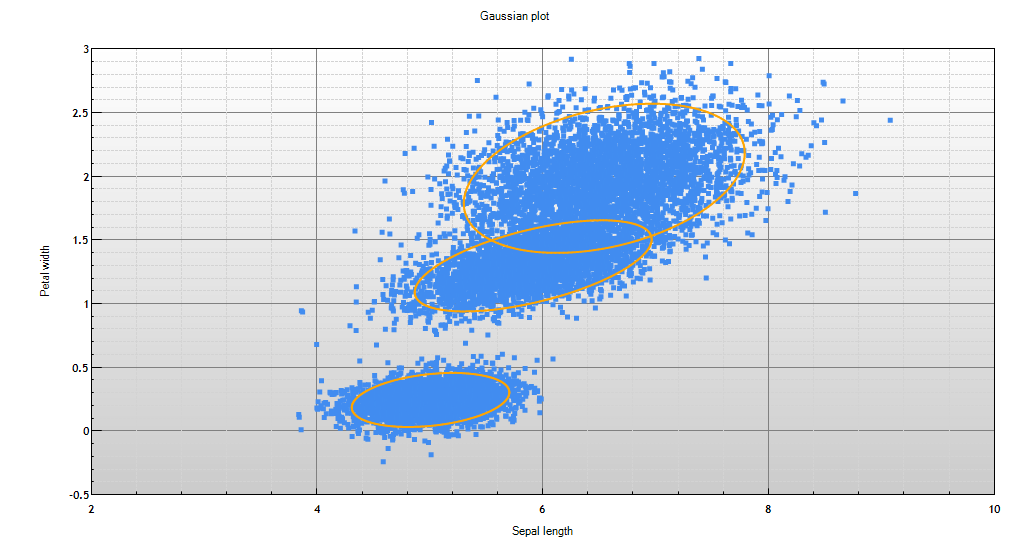

Gaussowski Model Mieszany można więc traktować jako uogólnienie metody k-średnich, gdzie wyszukiwane są nie tylko środki skupień, ale także ich kształty, rozmiary i kierunki (od $\Sigma ^{(1)}$ do $\Sigma ^{(k)}$), a także ich względne wagi (od $\phi ^{(1)}$ do $\phi ^{(k)}$).

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

In [ ]:
X, _ = make_blobs(n_samples=1000, random_state=42)

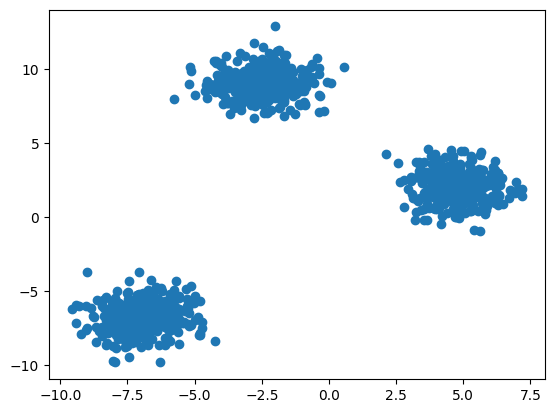

In [ ]:
plt.scatter(X[:, 0], X[:, 1])

In [ ]:
gmm = GaussianMixture(n_components=3)
gmm.fit(X)

GaussianMixture(n_components=3)

In [ ]:
gmm.weights_

array([0.334, 0.333, 0.333])

In [ ]:
gmm.means_

array([[-2.52414179,  9.00394283],
       [-6.86656253, -6.78519427],
       [ 4.7286341 ,  2.05557266]])

In [ ]:
gmm.covariances_

array([[[ 1.01568167,  0.00570676],
        [ 0.00570676,  0.94606849]],

       [[ 0.95188306,  0.06313685],
        [ 0.06313685,  1.03517333]],

       [[ 0.81032368, -0.06743224],
        [-0.06743224,  1.09348765]]])

In [ ]:
np.rint(len(X) * gmm.weights_).astype(np.int16)

array([334, 333, 333], dtype=int16)

Warto zauważyć, że w przypadku Gaussowskiego Modelu Mieszanego zdecydowanie lepiej sprawdza się miękkie podejście do analizy skupień, która wyznacza prawdopodobieństwo przynależności obiektu do każdego z $k$ skupień. W tym przypadku skupienia będą aktualizowane na podstawie wszystkich obiektów, lecz proporcjonalnie do stopnia przynależności każdego z nich do poszczególnych skupień.  

Podczas inicjalizacji obiektu klasy *GaussianMixture* warto wskazać dodatkowo parametr *n_iter*, który dokonuje wskazaną liczbę operacji klasteryzacji celem znalezienia optymalnej zbieżności. Atrybuty *converged_* i *n_iter_* odpowiadają uzyskaniu zbieżności oraz liczbie iteracji wykorzystanych w tym procesie.

In [ ]:
gmm.converged_

True

In [ ]:
gmm.n_iter_

2

Metoda *predict* zwraca najbardziej identyfikator najbardziej prawdopodobnego skupienia. Można jednak uzyskać pełny rozkład prawdopodobieństwa za pomocą metody *predict_proba*.

In [ ]:
gmm.predict(X)[:10]

array([1, 1, 2, 0, 0, 1, 2, 2, 2, 2])

In [ ]:
gmm.predict_proba(X).round(4)[:10]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

Uzyskane parametry skupień można wykorzystać do próbkowania (tworzenia) nowych obiektów, co czyni go modelem generatywnym.

In [ ]:
X_sample, y_sample = gmm.sample(5)

In [ ]:
X_sample, y_sample

(array([[-6.37615595, -5.51841454],
        [ 5.9668685 ,  0.37118336],
        [ 4.09883985,  2.2966515 ],
        [ 5.0375612 ,  1.14932897],
        [ 4.96960962,  0.16291835]]),
 array([1, 2, 2, 2, 2]))

Klasa *GaussianMixture* umożliwia także oszacowanie gęstości w danym obszarze za pomocą metody *score_samples*. Metoda ta zwraca gęstości prawdopodobieństwa dla każdego obiektu.

In [ ]:
gmm.score_samples(X)[:10]

array([-3.03346683, -3.2190725 , -3.0109888 , -3.38203158, -4.11961306,
       -2.94324709, -3.06711963, -3.34798839, -3.65409721, -3.94417225])

Wartości te można wykorzystać później przy określaniu regionów gęstości poszczególnych skupień.

## Dobór optymalnej liczby skupień

Z uwagi na różnice w rozmiarach i kształtach skupień, Gaussowski Model Mieszany wymaga odrębnego podejścia w ocenie optymalności wyznaczonych skupień.

W metodach probabilistycznych opartych na Gaussowskich rozkładach prawdopodobieństwa zdecydowanie lepiej sprawdzą się miary **Bayesowskiego Kryterium Informacyjnego** oraz **Kryterium Informacyjnego Akaiego**. Oba ze wskaźników są przeznaczone do oceny stopnia dopasowania skupień do charakteru danych. Oba wskaźniki zwracają zwykle podobne wyniki, lecz metoda Bayesowska ma tendencję skłaniającą ją w kierunku modeli o mneijszej liczbie parametrów, w przeciwieństwie do metody Akaiego skłaniającej się do modeli o większej liczbie parametrów, co wynika z lepszego dopasowania się do charakteru danych.

Do wyznaczenia wartości **Bayesowskiego Kryterium Informacyjnego** oraz **Kryterium Informacyjnego Akaiego** służą odpowiednio metody *bic* oraz *aic*.

In [ ]:
gmm.bic(X)

7928.826066624158

In [ ]:
gmm.aic(X)

7845.394226881462

Do wyznaczenia optymalnej liczby skupień należy wybrać model, który osiąga minimum dla wybranego wskaźnika.

In [ ]:
bics, aics = [], []
clusters = np.arange(2, 11)

for k in clusters:
  gmm = GaussianMixture(n_components=k, n_init=10)
  gmm.fit(X)
  bics.append(gmm.bic(X))
  aics.append(gmm.aic(X))

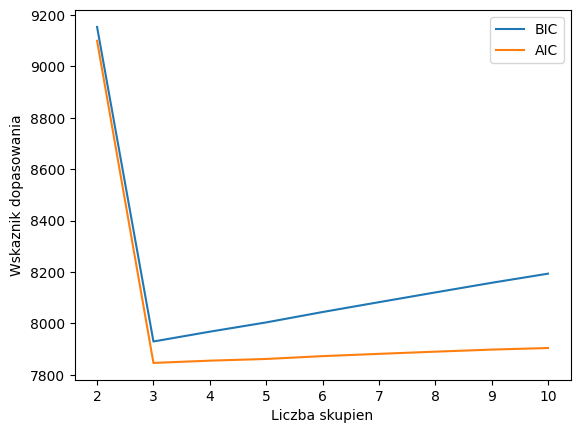

In [ ]:
plt.plot(clusters, bics, label='BIC')
plt.plot(clusters, aics, label='AIC')

plt.legend()
plt.xlabel('Liczba skupien')
plt.ylabel('Wskaznik dopasowania')

plt.show()

In [ ]:
np.argmin(bics) + 2

3

In [ ]:
np.argmin(aics) + 2

3

## Zadania

1. Wykonać zadania z laboratorium nr 2 korzystając z *Gaussowskiego Modelu Mieszanego* (zamiast algorytmu *k-średnich*) oraz towarzyszących mu miar jakości skupień.